## <center> Python Geospatial Data Analysis Title

### Libraries

In [17]:
import pandas as pd
import folium
import math
from folium.plugins import MarkerCluster,HeatMap
import seaborn as sns

### Data

In [18]:
df=pd.read_csv('https://raw.githubusercontent.com/VinitaSilaparasetty/coursera-spatial-data-analysis/master/boston-crime%202.csv')
df.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Date,Time
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13,09:28:24
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12,20:11:26
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12,15:12:43


### Base Map

In [19]:
boston=(42.358443,-71.05877)
m=folium.Map(location=boston, tile='Stamen terrain, zoom_start=12')
m

### Crime Scenes

In [20]:
mc=MarkerCluster()
for idx,row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'],row['Long']]))
m.add_child(mc)

### Districts with Highest Crime Rates

In [21]:
crime=df.groupby(['DISTRICT','STREET','REPORTING_AREA','Lat','Long']).sum().reset_index()

In [22]:
crime.update(crime['DISTRICT'].map('DISTRICT:{}'.format))
crime.update(crime['REPORTING_AREA'].map('REPORTS:{}'.format))

In [23]:
m2=folium.Map(location=boston,tiles='stamentoner',zoom_start=12)
HeatMap(data=crime[['Lat','Long']],radius=15).add_to(m2)
def plotDot(point):
    folium.CircleMarker(location=[point.Lat,point.Long],
                       radius=5,
                       weight=2,
                       popup=[point.DISTRICT,point.REPORTING_AREA],
                       fill_color='#000000').add_to(m2)
crime.apply(plotDot,axis=1)
m2.fit_bounds(m2.get_bounds())
m2

### Medical Assistance Analysis

In [24]:
med=df.loc[df.OFFENSE_CODE_GROUP=='Medical Assistance'][['Lat','Long']]
med.Lat.fillna(0,inplace=True)
med.Long.fillna(0,inplace=True)
m6=folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=med,radius=16).add_to(m6)
m6

### Crimes Commited

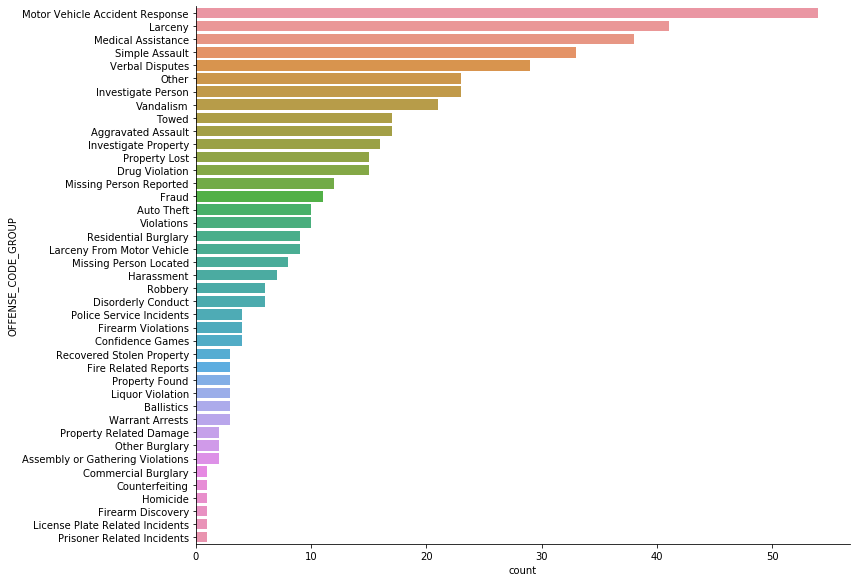

In [25]:
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
           height=8,
           aspect=1.5,
           order=df.OFFENSE_CODE_GROUP.value_counts().index,
           data=df)

### Motor Vehicle Accident Response

In [26]:
mv=df.loc[df.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response'][['Lat','Long']]
med.Lat.fillna(0,inplace=True)
med.Long.fillna(0,inplace=True)
m4=folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=mv,radius=16).add_to(m4)
m4

### Larceny

In [27]:
lar=df.loc[df.OFFENSE_CODE_GROUP=='Larceny'][['Lat','Long']]
lar.Lat.fillna(0,inplace=True)
lar.Long.fillna(0,inplace=True)
m5=folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=lar,radius=16).add_to(m5)
m5